Hadoop Project Covid 19

In [ ]:
# 📌 Install required libraries (if not already)
!pip install pandas matplotlib

# 📌 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 📌 Read the uploaded CSV files into DataFrames
daily_df = pd.read_csv('/content/worldometer_coronavirus_daily_data.csv')
summary_df = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')

# 📌 Display first 5 rows to confirm structure
print("\n--- Daily Data ---")
print(daily_df.head())

print("\n--- Summary Data ---")
print(summary_df.head())

# 📌 Show the columns in each
print("\nColumns in daily.csv:", daily_df.columns.tolist())
print("Columns in summary.csv:", summary_df.columns.tolist())

# ✅ MapReduce Simulation:
# Goal — Total new cases and deaths per country from daily_df

daily_summary = daily_df.groupby('country')[['daily_new_cases', 'daily_new_deaths']].sum().reset_index()
daily_summary = daily_summary.sort_values(by='daily_new_cases', ascending=False)

print("\n--- Total New Cases and Deaths per Country (from daily.csv) ---")
print(daily_summary)

# ✅ Merge daily summary with existing summary data for comparison
merged_df = pd.merge(daily_summary, summary_df, how='left', on='country')
print("\n--- Merged Summary: Daily Aggregation + Existing Summary ---")
print(merged_df)

# 📌 Save the merged result as a new CSV
merged_df.to_csv('Covid_Merged_Summary.csv', index=False)
files.download('Covid_Merged_Summary.csv')

# ✅ Data Visualization — Top 10 countries by total new cases
top_10 = daily_summary.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10['country'], top_10['daily_new_cases'], color='skyblue')
plt.title('Top 10 Countries by Total New COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# ✅ Simulate Distributed Sorting (Hadoop-like)
# Split dataset into 2 'partitions' (as if on different nodes)
partition1 = daily_df.iloc[:len(daily_df)//2]
partition2 = daily_df.iloc[len(daily_df)//2:]

# Local sort (as done on each node)
partition1_sorted = partition1.sort_values(by=['country', 'date'])
partition2_sorted = partition2.sort_values(by=['country', 'date'])

# Merge sorted partitions (like Hadoop merge sort step)
distributed_sorted_df = pd.concat([partition1_sorted, partition2_sorted]).sort_values(by=['country', 'date'])

print("\n--- Distributed Sorting Simulation Done ---")
print(distributed_sorted_df.head())


# ✅ Simulate Combiner (Local aggregation before final reduce)
# Aggregate daily_new_cases per country in each partition

combiner1 = partition1.groupby('country')['daily_new_cases'].sum().reset_index()
combiner2 = partition2.groupby('country')['daily_new_cases'].sum().reset_index()

# Now, final reducer: combine results from both combiners
final_combined = pd.concat([combiner1, combiner2]).groupby('country')['daily_new_cases'].sum().reset_index()
final_combined = final_combined.sort_values(by='daily_new_cases', ascending=False)

print("\n--- Combiner Simulation + Final Reduce ---")
print(final_combined.head(10))


# ✅ Secondary Sorting (Sort within grouped data — date-wise per country)
# Equivalent to Hadoop secondary sort (like composite keys)

grouped = daily_df.groupby('country')
for country, group_data in grouped:
    sorted_group = group_data.sort_values(by='date')
    print(f"\n--- {country} Data Sorted by Date ---")
    print(sorted_group.head())


# ✅ Simulate Apache Pig-like Filtering Pipeline (chaining filters)

# Example: Filter records with > 10000 new cases and country not 'World'
filtered_data = daily_df[(daily_df['daily_new_cases'] > 10000) & (daily_df['country'] != 'World')]

print("\n--- Filtered Data (Pig-like Pipeline Simulation) ---")
print(filtered_data.head())


# ✅ Partitioning Simulation (like HDFS blocks)
# Split into n chunks (e.g., 3)

chunks = []
chunk_size = len(daily_df) // 3

for i in range(3):
    start = i * chunk_size
    end = None if i == 2 else (i+1) * chunk_size
    chunks.append(daily_df.iloc[start:end])

print("\n--- Data Partitioned into 3 Blocks ---")
for i, c in enumerate(chunks):
    print(f"\nBlock {i+1} shape: {c.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/worldometer_coronavirus_daily_data.csv'

Time Series of Daily New Cases and Deaths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

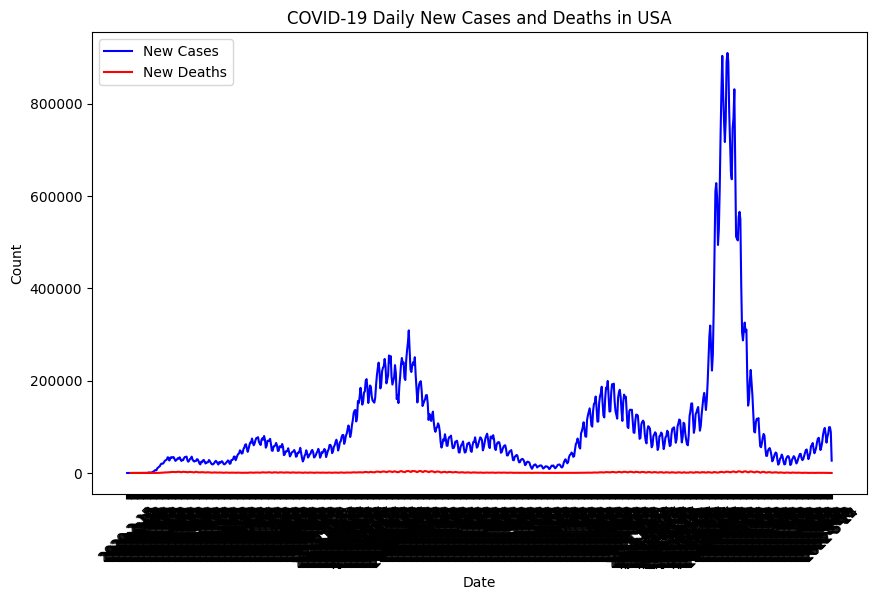

In [ ]:
plt.figure(figsize=(10, 6))
country_data = daily_df[daily_df['country'] == 'USA']  # Example: USA
plt.plot(country_data['date'], country_data['daily_new_cases'], label='New Cases', color='blue')
plt.plot(country_data['date'], country_data['daily_new_deaths'], label='New Deaths', color='red')
plt.title('COVID-19 Daily New Cases and Deaths in USA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
Histogram of Daily New Cases Across Countries

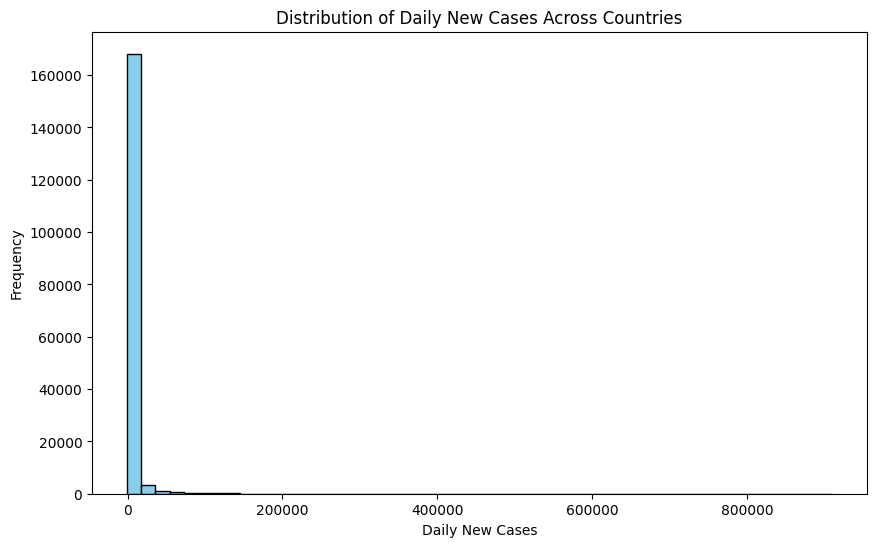

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(daily_df['daily_new_cases'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily New Cases Across Countries')
plt.xlabel('Daily New Cases')
plt.ylabel('Frequency')
plt.show()


Correlation Heatmap of Key Metrics (e.g., Total Cases, Deaths, Recovered, Active Cases)

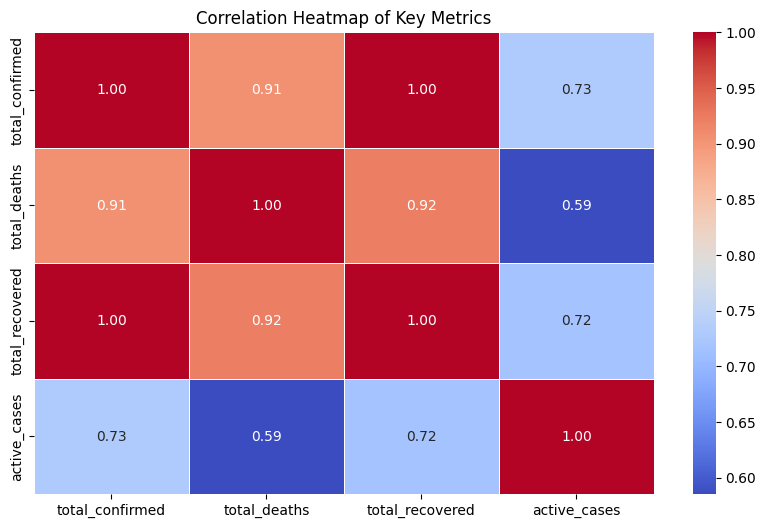

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = summary_df[['total_confirmed', 'total_deaths', 'total_recovered', 'active_cases']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Metrics')
plt.show()


Bar Plot for Total Cases and Total Deaths by Continent

<Figure size 1000x600 with 0 Axes>

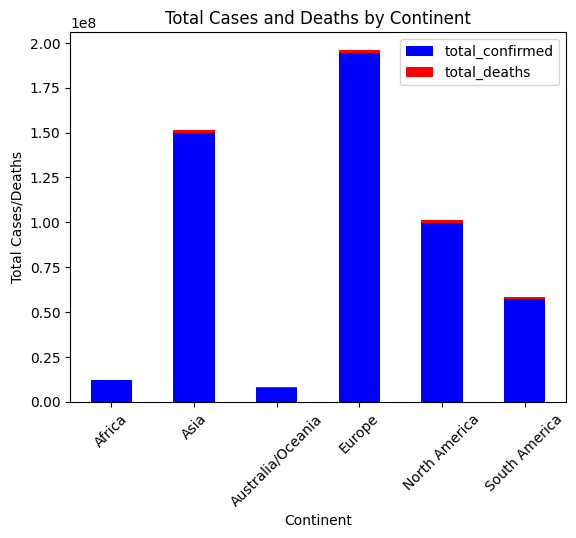

In [ ]:
continent_data = summary_df.groupby('continent')[['total_confirmed', 'total_deaths']].sum().reset_index()

plt.figure(figsize=(10, 6))
continent_data.set_index('continent')[['total_confirmed', 'total_deaths']].plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Total Cases and Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases/Deaths')
plt.xticks(rotation=45)
plt.show()


 Pie Chart of Total Cases Distribution Across Continents

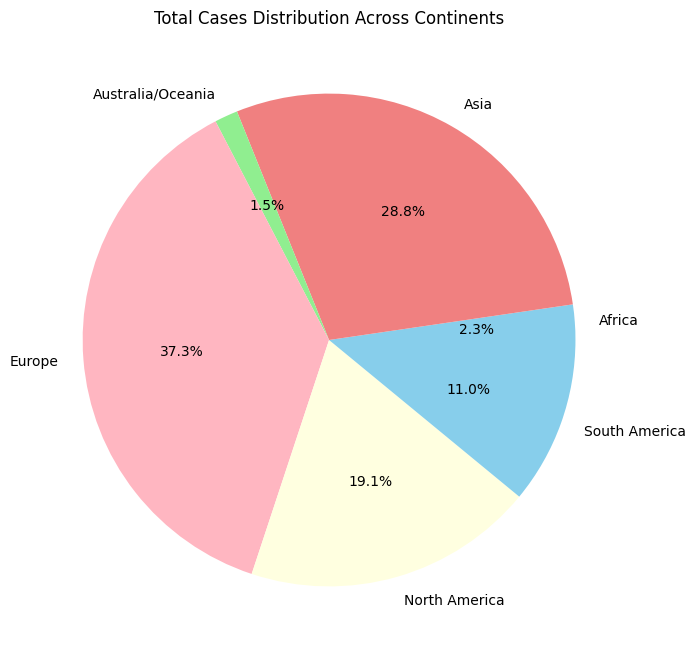

In [ ]:
continent_cases = summary_df.groupby('continent')['total_confirmed'].sum()

plt.figure(figsize=(8, 8))
continent_cases.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow'])
plt.title('Total Cases Distribution Across Continents')
plt.ylabel('')
plt.show()


Line Plot of Total Cases Over Time for Selected Countries

<ipython-input-12-e0f83e552af3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])  # Ensure correct datetime format


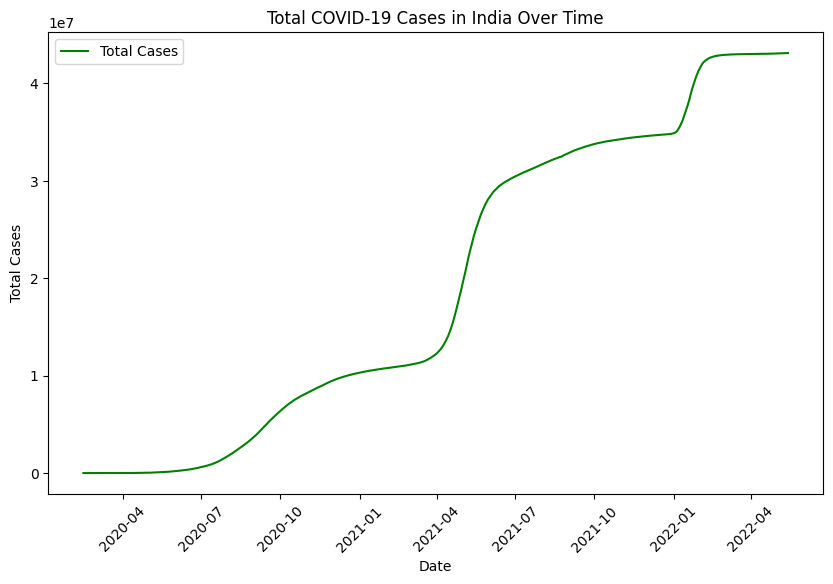

In [ ]:
plt.figure(figsize=(10, 6))
country_data = daily_df[daily_df['country'] == 'India']  # Example: India
country_data['date'] = pd.to_datetime(country_data['date'])  # Ensure correct datetime format
plt.plot(country_data['date'], country_data['cumulative_total_cases'], label='Total Cases', color='green')
plt.title('Total COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Box Plot for Deaths by Continent

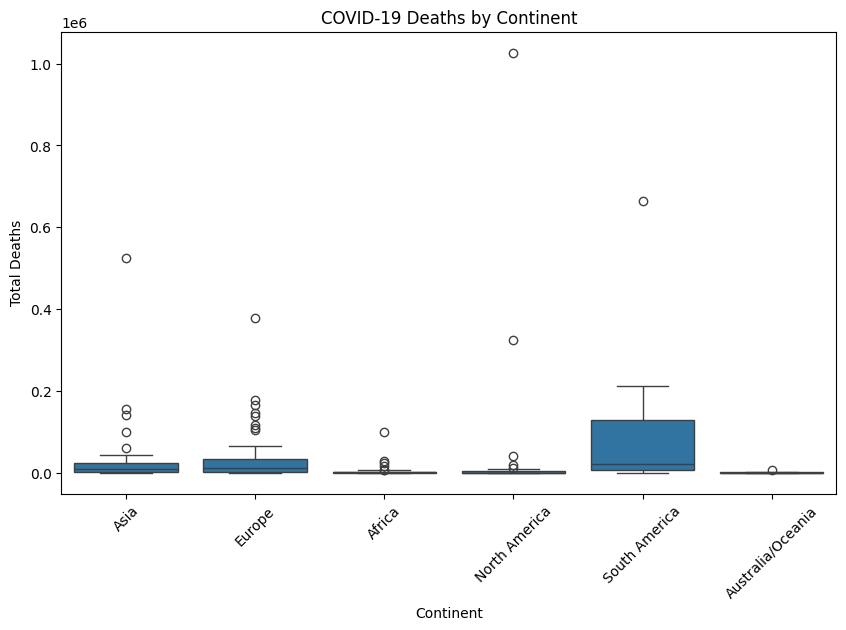

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='total_deaths', data=summary_df)
plt.title('COVID-19 Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/


 16741109465626066867643980214102.jpg
'AI900 Microsoft Azure AI Fundamentals.pdf'
'AIML danish.gdoc'
'AIML DEEPANSHU.docx'
 AntiraggingAffidavitForm.pdf
'B.R.D ML .gdoc'
 C++_2024H1_Assignment-12.gdoc
'Class notes.gdoc'
'Colab Notebooks'
 Csp-compressed.pptx
'Deepanshu - 22csu504'
'Deepanshu22csu504(1).png'
'Deepanshu22csu504(2).png'
 Deepanshu_22csu504.png
'Deepanshu .pdf'
'DeepanshuResume (1).pdf'
 DeepanshuResume.pdf
'Deepanshu SEPM.gdoc'
'Evolutionary Model in 21st-century healthcare.gdoc'
 IMG20231129223345.jpg
' Machine Learning.docx'
' Machine Learning.gdoc'
'os file deepanshu.docx'
'os file deepanshu.gdoc'
'Project Charter ML Project.gdoc'
'Receipt pay_PEwRLZV7iGtOkZ from Unique Training Solutions (Paid).pdf'
'Resume (1).gdoc'
'Resume (1).pdf'
 Resume.gdoc
 Resume.pdf
 SEPM_22csu504.gdoc
 SEPM_.gdoc
'SEPM LAB MANUAL.gdoc'
'SEPM LAB MANUAL.pdf'
'SEPM PPT.pptx'
'Student Lab Workbook (1).gdoc'
'Student Lab Workbook.gdoc'
'Tanisha resume(final).gdoc'
'Untitled document (1).gdoc'
'U

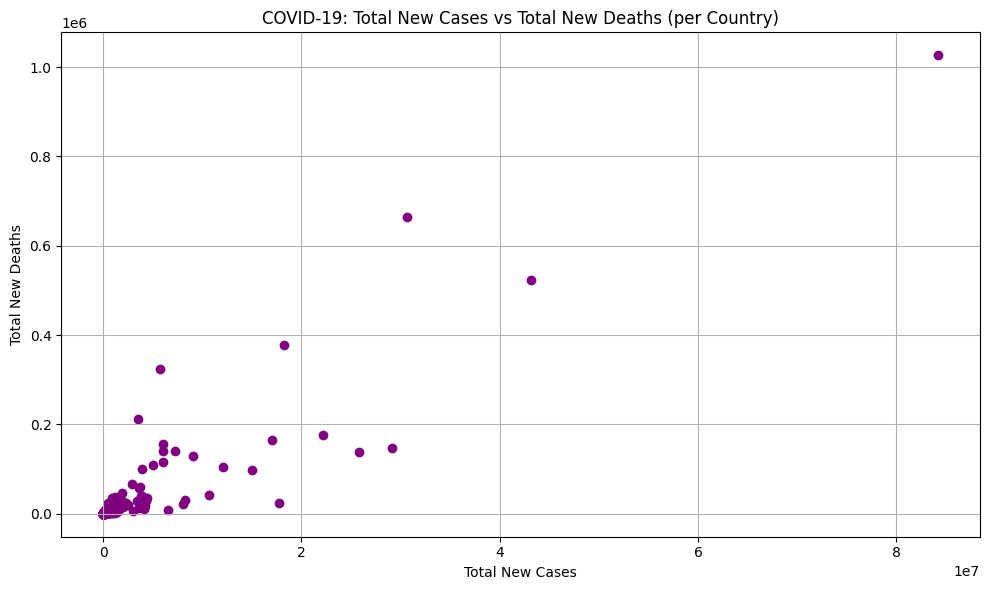

In [ ]:
# ✅ Scatter Plot — New Cases vs New Deaths
plt.figure(figsize=(10, 6))
plt.scatter(daily_summary['daily_new_cases'], daily_summary['daily_new_deaths'], color='purple')
plt.title('COVID-19: Total New Cases vs Total New Deaths (per Country)')
plt.xlabel('Total New Cases')
plt.ylabel('Total New Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()